### hw_6

### Взаимосвязь величин. Показатели корреляции. Корреляционный анализ. Проверка на нормальность

### Многомерный статистический анализ

__Задача 1__

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br>
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. <br>
Найдите __ковариацию__ этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.<br>
Найдите __коэффициент корреляции Пирсона__ с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

<hr>

In [39]:
import numpy as np

In [44]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

### Показатели корреляции

__Ковариация__ — мера линейной зависимости случайных величин. Её формула похожа на формулу дисперсии (_variance_). 

Формула ковариации случайных величин $X$ и $Y$:
$$\operatorname{cov}(X, Y) = M\left( (X - M(X)) (Y - M(Y)) \right).$$

Несмещённую оценку ковариации можно посчитать следующим образом:
$$\sigma_{XY} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right) \cdot \left( y_i - \overline{Y} \right)$$

Здесь $X$, $Y$ — выборки размера $n$.

In [149]:
Y = np.array(zp)
X = np.array(ks)
cov = ((X- X.mean()) * (Y- Y.mean())).mean()
cov

print(f'Ковариация заработной платы заемщиков и значения их поведенческого кредитного скоринга равна {cov}')

Ковариация заработной платы заемщиков и значения их поведенческого кредитного скоринга равна 9157.84


In [151]:
# То же через numpy
np.cov(X, Y, ddof=0)[0,1]

9157.84

__Коэффициент корреляции Пирсона__: $r_{XY} = \dfrac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y}$

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{X} \right)^2$$


In [158]:
sko_X = ((X - MX)**2).sum() / len(X)
sko_Y = ((Y - MY)**2).sum() / len(Y)
r_XY = cov / ((sko_X)**0.5 * (sko_Y)**0.5)

print(f'Коэффициент корреляции Пирсона:  𝑟_𝑋𝑌:{round(r_XY,4)}')
print(f'Проверка через numpy:  𝑟_𝑋𝑌(numpy) :{round(np.corrcoef(X,Y)[0,1],4)}')


Коэффициент корреляции Пирсона:  𝑟_𝑋𝑌:0.8875
Проверка через numpy:  𝑟_𝑋𝑌(numpy) :0.8875


__Задача 2__

Измерены значения IQ выборки студентов,обучающихся в местных технических вузах:<br>
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.<br>
Известно, что в генеральной совокупности IQ распределен нормально.<br>
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

<hr>

In [182]:
from scipy import stats

In [183]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [191]:
scale = iq.std()
mean = iq.mean()
n = len(iq)
p = 0.95
alpha = round((1 - p),3)
t = stats.t.ppf(1 - alpha/2, df=n-1)
print(f'mean = {mean}')
print(f'scale = {scale}')
print(f'n = {n}')
print(f'alpha = {alpha}')
print(f't = {t}')

mean = 118.1
scale = 10.004498987955369
n = 10
alpha = 0.05
t = 2.2621571627409915


Доверительный интервал:
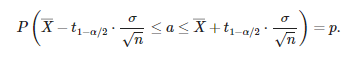

In [192]:
# А доверительный интервал:
(mean - t * scale / np.sqrt(n)), (mean + t * scale / np.sqrt(n))

(110.9432125583706, 125.25678744162938)

In [193]:
print(f'Ширина интервала: = {(mean + t * scale / np.sqrt(n)) - (mean - t * scale / np.sqrt(n))}')

Ширина интервала: = 14.31357488325878


__Задача 3__

Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. <br>
Найдите доверительный интервал для математического
ожидания с надежностью 0.95.


<hr>

In [200]:
D = 25
n = 27
mean = 174.2
p = 0.95
scale = np.sqrt(D)
alpha = round((1 - p),3)
print(f'mean = {mean}')
print(f'scale = {scale}')
print(f'n = {n}')
print(f'alpha = {alpha}')
# Так как известна дисперсия, то можем воспользоваться нормальным распределением:
t = stats.norm.ppf(1 - alpha/2)
print(f't = {t}')

mean = 174.2
scale = 5.0
n = 27
alpha = 0.05
t = 1.959963984540054


In [201]:
# А доверительный интервал будет равен:
(mean - t * scale / np.sqrt(n)), (mean + t * scale / np.sqrt(n))


(172.3140237765397, 176.08597622346028)